<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/32_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agenda
1. iDENTIFICAR PROBLEMA
2. cARGAR datos
3. Clasificar datos empleado Regresion
Logisitca
4. uSO DE MODELOS

1. iDENTIFICA EL PROBlema: De una base de datos que muestra si un lote de articulso sera defectuoso o no

2. Cargar os datos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
df= pd.read_excel("/content/datos-logisticos.xlsx")
df.head()

,Muestra,Productos-Lote,Tiempo-Entrega,Defectuoso
0,1,19,19000,0
1,2,35,20000,0
2,3,26,43000,0
3,4,27,57000,0
4,5,19,76000,0


In [8]:
X1="Productos-Lote"
X2="Tiempo-Entrega"
Y1="Defectuoso"

In [9]:
X=df[[X1,X2]].values
Y=df[Y1].values
#Entrenar el modelo datos
model=LogisticRegression(solver="liblinear")
model.fit(X,Y)

LogisticRegression(solver='liblinear')

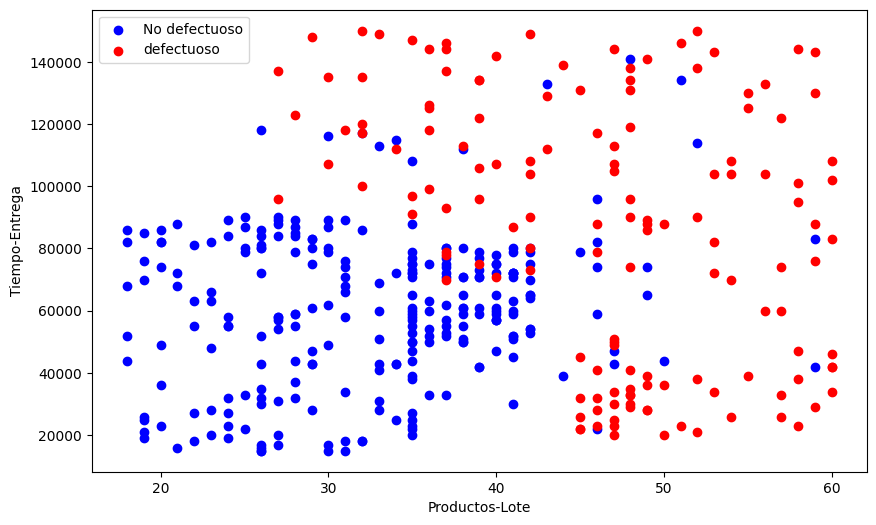

In [10]:
#Crear la maya con clasificacion
x_min, x_max=df[X1].min()- 0.5,df[X1].max()+0.5
y_min, y_max=df[X2].min()- 0.5,df[X2].max()+0.5
h=(x_max-x_min)/100
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Predecir con el modelo en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#CREAR REGISTRPS DE GRAFICO
plt.figure(figsize=(10,6))
plt.scatter(df[Y==0][X1],df[Y==0][X2],color="blue",label="No defectuoso")
plt.scatter(df[Y==1][X1],df[Y==1][X2],color="red",label="defectuoso")
#ETIEquetas de leyeda
plt.xlabel(X1)
plt.ylabel(X2)
plt.legend()
plt.show()

In [11]:
#CREAR UN ESCALADOR
scaler=StandardScaler()
scaler.fit(X)

X_scaled=scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)

In [12]:
df[X1].shape

(400,)